In [1]:
from scipy.integrate import odeint,solve_ivp
import matplotlib.pyplot as plt
import numpy as np

### y' = x

In [24]:
def f(x,y):
    return x

In [25]:
x = np.linspace(0,10,100)
y0=0

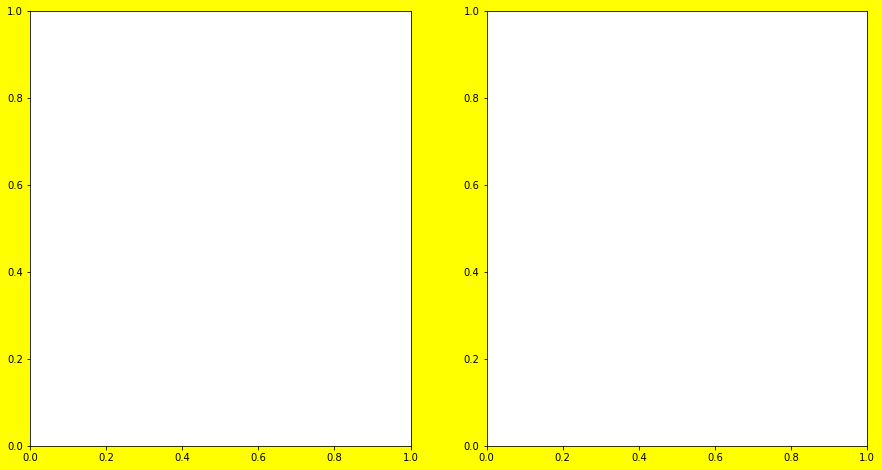

In [26]:
fig = plt.figure()
fig.set(facecolor='yellow', figheight=8, figwidth=15)
gs = plt.GridSpec(1, 2, figure=fig)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

c:\Pytnon38\lib\site-packages\scipy\integrate\_odepack_py.py:250: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)


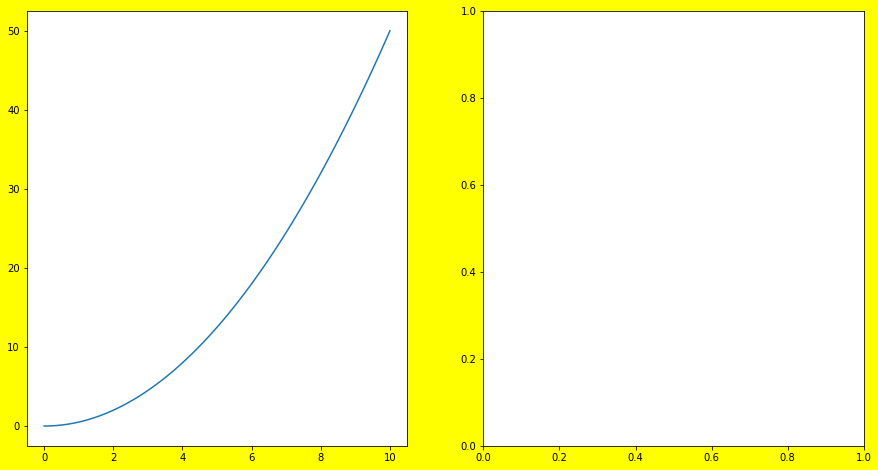

In [27]:
y_sol1 = odeint(func=f,y0=y0,t=x,tfirst=True,printmessg=True)
ax1.plot(x,y_sol1[:,0])
fig

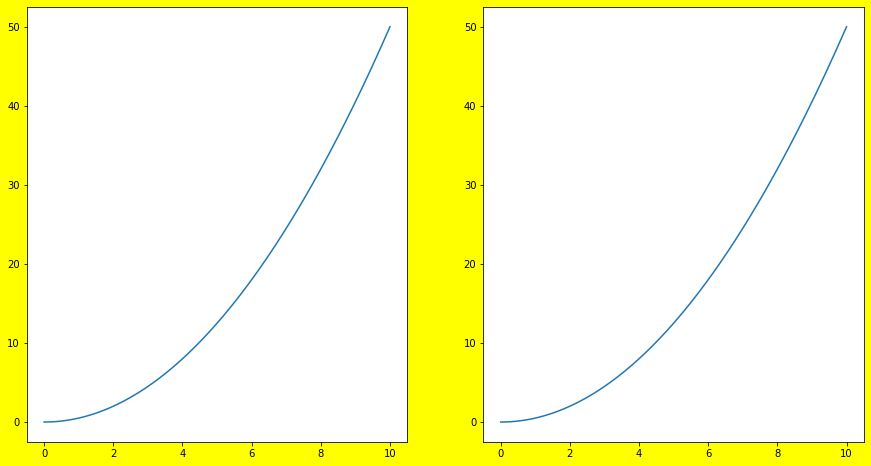

In [28]:
y_sol2 = solve_ivp(fun=f, y0=[y0], t_eval=x, t_span=(min(x), max(x)))
ax2.plot(x, y_sol2.y[0])
fig

### y'= exp(x^2)

In [29]:
def f (x,y):
    return np.exp(x**2)

In [30]:
x = np.linspace(0,10,1000)
y0=0

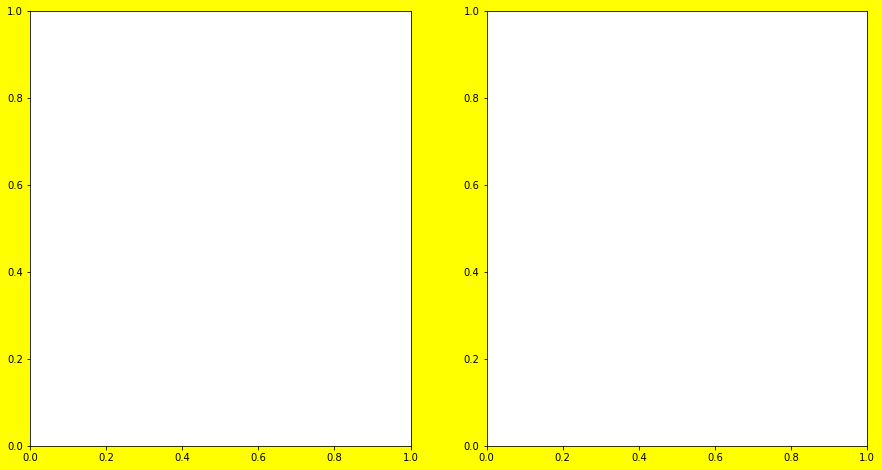

In [31]:
fig = plt.figure()
fig.set(facecolor='yellow', figheight=8, figwidth=15)
gs = plt.GridSpec(1, 2, figure=fig)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])


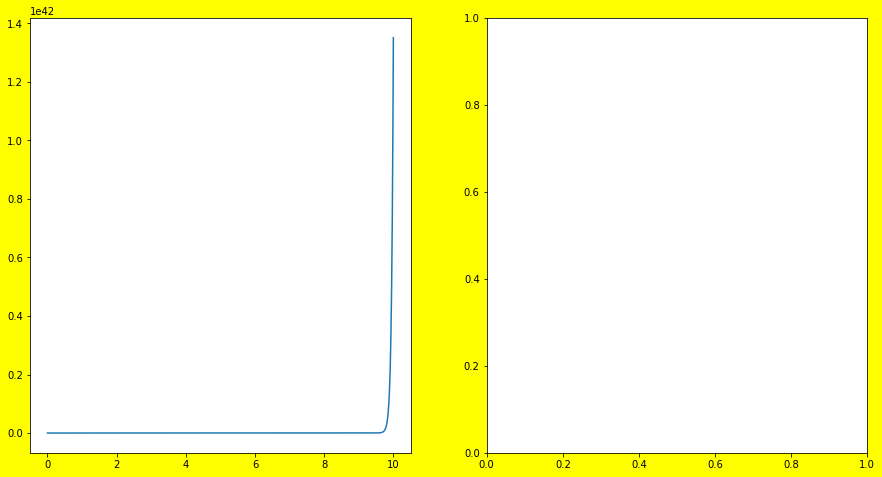

In [32]:
y_sol1 = odeint(func=f,y0=y0,t=x,tfirst=True,printmessg=True)
ax1.plot(x,y_sol1[:,0])
fig

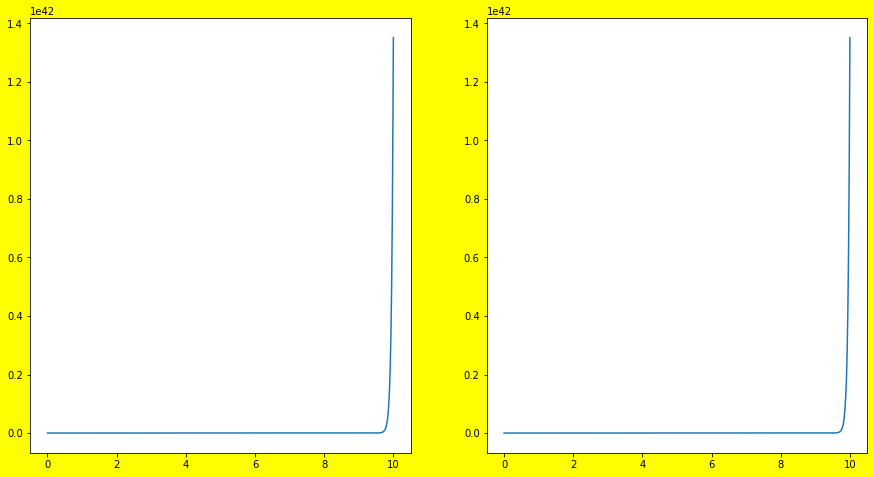

In [33]:
y_sol2 = solve_ivp(fun=f, y0=[y0], t_eval=x, t_span=(min(x), max(x)))
ax2.plot(x, y_sol2.y[0])
fig

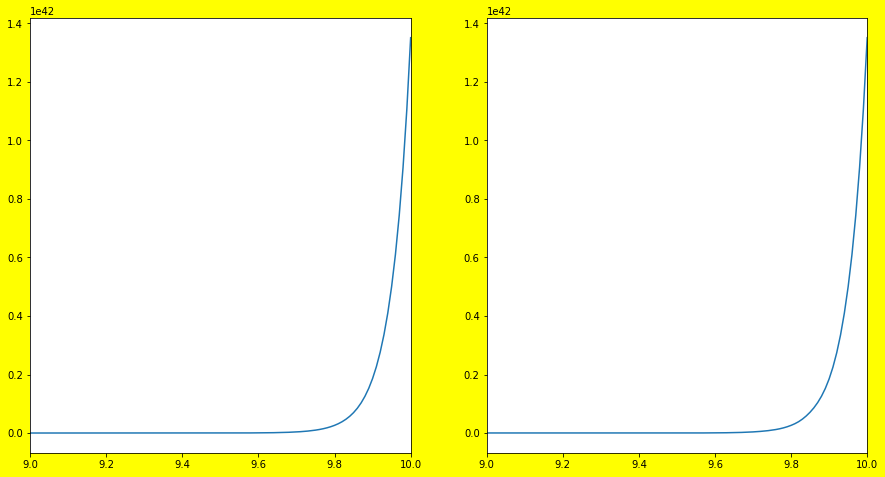

In [34]:
ax1.set_xlim(9,10)
ax2.set_xlim(9,10)
fig

### y'= 0.5 if x >= 4 else np.sin(x*y)/x*y

In [35]:
def f (x,y):
    return 0.5 if x >= 4 else np.sin(x*y)/x*y

In [36]:
x = np.linspace(1,10,1000)
y0=1

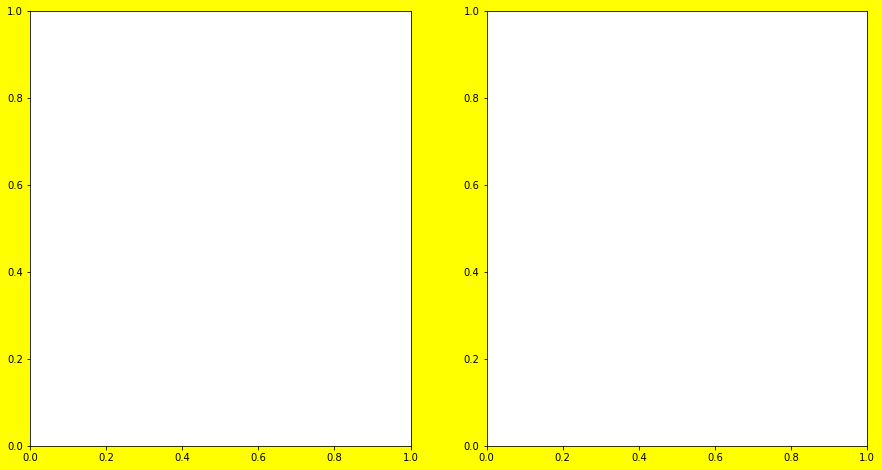

In [37]:
fig = plt.figure()
fig.set(facecolor='yellow', figheight=8, figwidth=15)
gs = plt.GridSpec(1, 2, figure=fig)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])


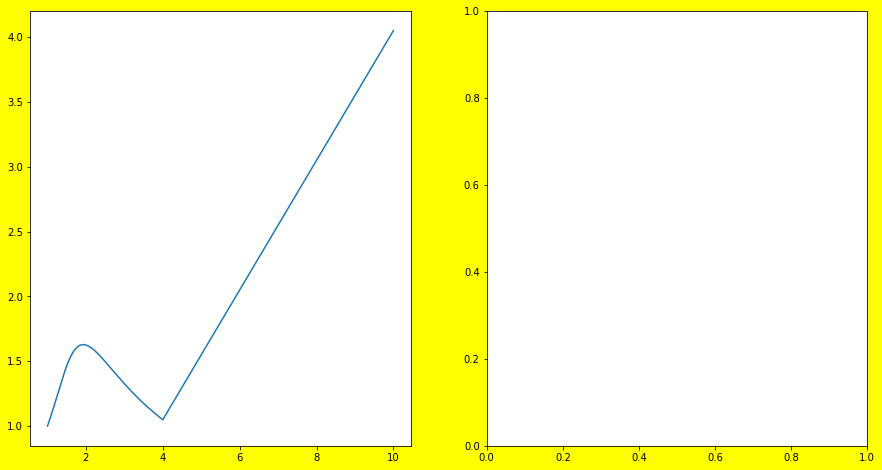

In [38]:
y_sol1 = odeint(func=f,y0=y0,t=x,tfirst=True,printmessg=True)
ax1.plot(x,y_sol1[:,0])
fig

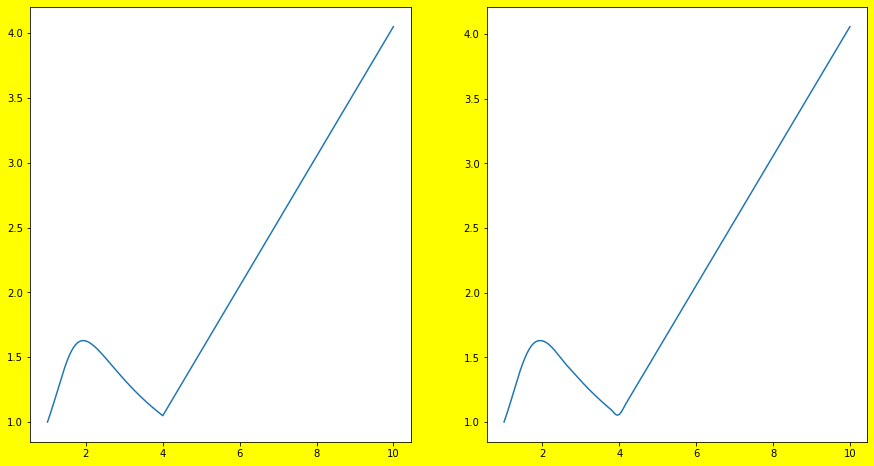

In [39]:
y_sol2 = solve_ivp(fun=f, y0=[y0], t_eval=x, t_span=(min(x), max(x)))
ax2.plot(x, y_sol2.y[0])
fig

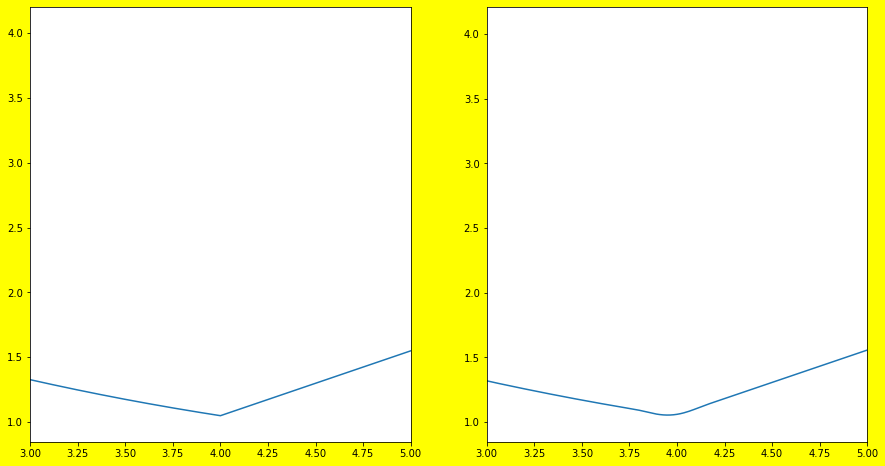

In [40]:
a=3
b=5
ax1.set_xlim(a,b)
ax2.set_xlim(a,b)
fig

### Tests of methods y' = 0.5 if x >= 4 else np.sin(x*y)/x*y

In [42]:
def f(t, y):

    return {
        t <= 2: 0, 
        2 < t < 4: -t, 
        4 <= t < 5: 2, 
        t >= 5: np.exp(-t*y/10)
        }[True]


t = np.linspace(1, 10, 50)
y0 = 1

method1 = 'RK23'
method2 = 'LSODA'


In [43]:
y1 = odeint(func=f, y0=y0, t=t, tfirst=True)
y2 = solve_ivp(fun=f, y0=[y0], t_eval=t, t_span=(min(t), max(t)))
y3 = solve_ivp(fun=f, y0=[y0], t_eval=t, t_span=(min(t), max(t)), method=method1)
y4 = solve_ivp(
    fun=f, y0=[y0], t_eval=t, t_span=(min(t), max(t)), method=method2
    )


C:\Users\STRANGER\AppData\Local\Temp\ipykernel_3736\4017922323.py:7: RuntimeWarning: overflow encountered in exp
  t >= 5: np.exp(-t*y/10)


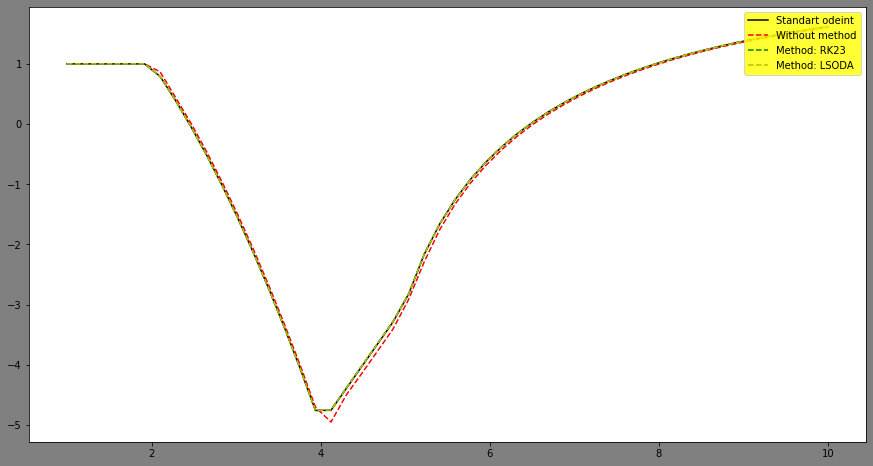

In [44]:
fig = plt.figure(figsize=(8, 16))
fig.set(facecolor='gray', figheight=8, figwidth=15)
ax = plt.subplot()
ax.plot(t, y1, 'black',label='Standart odeint')
ax.plot(t, y2.y[0], '--r', label='Without method')
ax.plot(t, y3.y[0], '--g', label=f'Method: {method1}')
ax.plot(t, y4.y[0],'--y', label=f'Method: {method2}')
ax.legend(loc='upper right', facecolor='yellow')

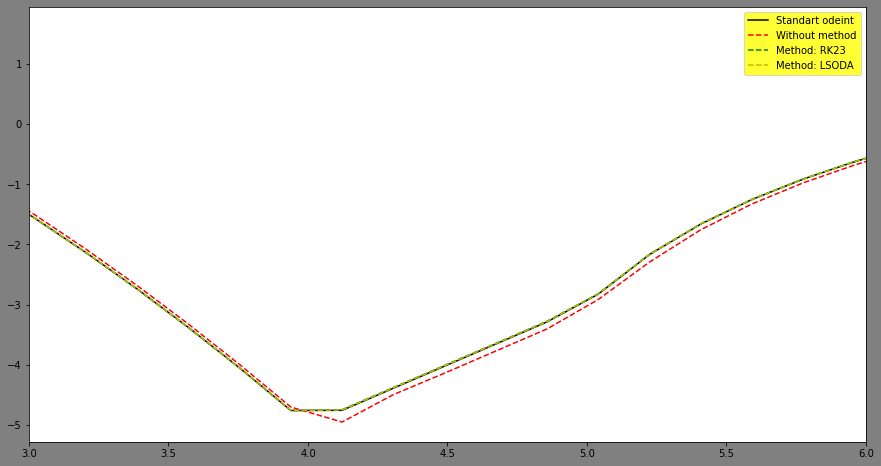

In [45]:
ax.set_xlim(3,6)
fig